# Séance 6 – Intelligence artificielle

## Exemple 0 : IA or not IA ? That is the question…

In [ ]:
Pour chacune des propositions suivantes, dire si vous la qualifieriez :

	a) d’IA	 à coup sûr		b) de non IA à coup sûr 	c) d’IA en quelques sortes


Proposition 1 : un tableur qui calcule des sommes et d’autres fonctions pré-définies à partir de données.

Proposition 2 : prédiction de l’évolution des prix d’une action cotée en bourse en ajustant sa courbe de prix aux données antérieures.

Proposition 3 :un système de navigation GPS pour déterminer la route la plus rapide

Proposition 4 : un système de recommandation de musiques comme Spotify qui fait des suggestions basée sur les choix antérieurs de l’utilisateur

Proposition 5 : des solutions de stockage de type Big Data qui peuvent stocker d’énormes quantités de données (images et vidéos) et les diffuser simultanément à beaucoup d’utilisateurs

Proposition 6 : des fonctionnalités d’édition de photos comme la luminosité et le contraste dans des logiciels comme Photoshop.

Proposition 7 : des filtres de transfert de style dans des applications comme Prisma (https://www.youtube.com/watch?v=nd3392aj69Y) qui charge une photo et la transforme avec différent styles artistiques (impressionniste, cubiste,…)

Proposition 8 : un programme comme Deep Blue qui a battu le champion Kasparov aux échecs en 1997

## Exemple 1 : Réseaux de neurones : 

In [2]:
import IPython.display as display
fig = """
<iframe width="800" height="600" src="https://pixees.fr/classcodeiai/app/tuto1/" style="border: 1px solid black"></iframe>
"""
display.HTML(fig)

## Exemple 2 : Les courbes d’ajustement : Python

équation : y=a*x+b
a =  474.069
b = 5063.977


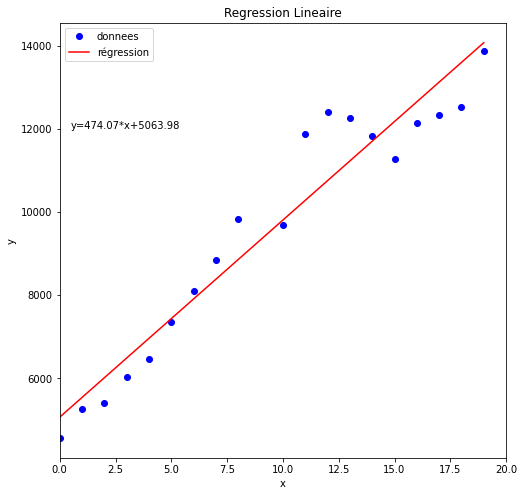

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# récupération données
x = list()
y = list()

# lecture du fichier
with open("data/donnees.txt", "r") as inp:
    for line in inp:
        xi, yi = line.split()
        x.append(float(xi))
        y.append(float(yi))

# modélisation
parametres = np.polyfit(x, y, 1)
a, b = parametres
print("équation : y=a*x+b")
print("a = {:8.3f}\nb = {:8.3f}".format(a, b))
message = 'y=' + str(round(a,2)) + '*x' + '+' + str(round(b,2))

#affichage
plt.rcParams['figure.figsize'] = 8, 8 # ajuste la taille des figures
plt.plot(x, y, "bo", label="donnees") # les points (x, y) representes par des points
plt.plot( # droite de regression
    [x[0], x[-1]],                  # valeurs de x
    [a * x[0] + b, a * x[-1] + b],  # valeurs de y
    "r-",                           # couleur rouge avec un trait continu
    label="régression")             # legende
plt.xlabel("x") # nom de l'axe x
plt.ylabel("y") # nom de l'axe y
plt.xlim(0, 20) # échelle axe x
plt.legend() # la legende
plt.title("Regression Lineaire") # titre de graphique
plt.text(0.5,12000,message)
plt.show()

## Exemple 3 : Proche voisin : Géogébra

In [3]:
import IPython.display as display
fig = """
<iframe width="800" height="600" src="https://www.geogebra.org/m/qp9hjzef" style="border: 1px solid black"></iframe>
"""
display.HTML(fig)

## Exemple 4 : Twitch

In [4]:
import IPython.display as display
fig = """
<iframe width="800" height="600" src="https://www.easyzoom.com/image/266533" style="border: 1px solid black"></iframe>
"""
display.HTML(fig)


## Exemple 5 : Manipulation d’une IA sur le jeux du bâton

In [5]:
from random import randint
import random
import numpy as np

##### Définition du jeu #####

class StickGame(object):
    """
        StickGame.
    """

    def __init__(self, nb):
        # @nb Number of stick to play with
        super(StickGame, self).__init__()
        self.original_nb = nb
        self.nb = nb

    def is_finished(self):
        # Check if the game is over @return Boolean
        if self.nb <= 0:
            return True
        return False

    def reset(self):
        # Reset the state of the game
        self.nb = self.original_nb
        return self.nb

    def display(self):
        # Display the state of the game
        print ("| " * self.nb)

    def step(self, action):
        # @action either 1, 2 or 3. Take an action into the environement
        self.nb -= action
        if self.nb <= 0:
            return None, -1
        else:
            return self.nb, 0

##### Définition des joueurs #####

class StickPlayer(object):
    """
        Stick Player
    """

    def __init__(self, is_human, size, trainable=True):
        # @nb Number of stick to play with
        super(StickPlayer, self).__init__()
        self.is_human = is_human
        self.history = []
        self.V = {}
        for s in range(1, size+1):
            self.V[s] = 0.
        self.win_nb = 0.
        self.lose_nb = 0.
        self.rewards = []
        self.eps = 0.99
        self.trainable = trainable

    def reset_stat(self):
        # Reset stat
        self.win_nb = 0
        self.lose_nb = 0
        self.rewards = []

    def greedy_step(self, state):
        # Greedy step
        actions = [1, 2, 3]
        vmin = None
        vi = None
        for i in range(0, 3):
            a = actions[i]
            if state - a > 0 and (vmin is None or vmin > self.V[state - a]):
                vmin = self.V[state - a]
                vi = i
        return actions[vi if vi is not None else 1]

    def play(self, state):
        # PLay given the @state (int)
        if self.is_human is False:
            # Take random action
            if random.uniform(0, 1) < self.eps:
                action = randint(1, 3)
            else: # Or greedy action
                action = self.greedy_step(state)
        else:
            action = int(input("$>"))
        return action

    def add_transition(self, n_tuple):
        # Add one transition to the history: tuple (s, a , r, s')
        self.history.append(n_tuple)
        s, a, r, sp = n_tuple
        self.rewards.append(r)

    def train(self):
        if not self.trainable or self.is_human is True:
            return

        # Update the value function if this player is not human
        for transition in reversed(self.history):
            s, a, r, sp = transition
            if r == 0:
                self.V[s] = self.V[s] + 0.001*(self.V[sp] - self.V[s])
            else:
                self.V[s] = self.V[s] + 0.001*(r - self.V[s])

        self.history = []

##### définition de la partie #####

def play(game, p1, p2, train=True):
    state = game.reset()
    players = [p1, p2]
    random.shuffle(players)
    p = 0
    while game.is_finished() is False:

        if players[p%2].is_human:
            game.display()

        action = players[p%2].play(state)
        n_state, reward = game.step(action)

        #  Game is over. Ass stat
        if (reward != 0):
            # Update stat of the current player
            players[p%2].lose_nb += 1. if reward == -1 else 0
            players[p%2].win_nb += 1. if reward == 1 else 0
            # Update stat of the other player
            players[(p+1)%2].lose_nb += 1. if reward == 1 else 0
            players[(p+1)%2].win_nb += 1. if reward == -1 else 0

        # Add the reversed reward and the new state to the other player
        if p != 0:
            s, a, r, sp = players[(p+1)%2].history[-1]
            players[(p+1)%2].history[-1] = (s, a, reward * -1, n_state)

        players[p%2].add_transition((state, action, reward, None))

        state = n_state
        p += 1

    if train:
        p1.train()
        p2.train()

##### Programme principal #####

if __name__ == '__main__':
    game = StickGame(12)

    # Joueur artificiel à entrainer
    p1 = StickPlayer(is_human=False, size=12, trainable=True)
    p2 = StickPlayer(is_human=False, size=12, trainable=True)
    # Joueur humain et joueur articiel sans entrainement
    human = StickPlayer(is_human=True, size=12, trainable=False)
    random_player = StickPlayer(is_human=False, size=12, trainable=False)

    # Entrainement des joueurs artificiels
    # valeur à changer pour plus ou moins entrainer l'IA.
    intelligence = 1000
    for i in range(0, intelligence):
        if i % 10 == 0:
            p1.eps = max(p1.eps*0.996, 0.05)
            p2.eps = max(p2.eps*0.996, 0.05)
        play(game, p1, p2)
    p1.reset_stat()

    # joueur artificiel entraîné vs joueur artificiel non entraîné.
    for _ in range(0, 1000):
        play(game, p1, random_player, train=False)
    print("p1 taux de victoire contre une IA simple", p1.win_nb/(p1.win_nb + p1.lose_nb))
    
    print("--------------------------")
    
    # joueur artificiel entraîné vs nous
    while True:
        play(game, p1, human, train=False)
        print("votre taux de victoire", human.win_nb/(human.win_nb + human.lose_nb))

p1 taux de victoire contre une IA simple 0.657
--------------------------
| | | | | | | | | | | | 


$> 3


| | | | | | | | 


$> 2


| | | 


$> 2


votre taux de victoire 1.0
| | | | | | | | | | | | 


$> exit


ValueError: invalid literal for int() with base 10: 'exit'

In [7]:
import session_info
session_info.show()